In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:

Hacer una exploración inicial del dataframe.
- ¿Cuántas filas tiene?

In [3]:
filas=df.shape[0]
print(f"El archivo tiene {filas} filas")

El archivo tiene 1338 filas


¿Cuántas nulos tiene?

In [4]:
nulos=df.isnull().sum()
print("Los valores nulos en nuestro DataFrame son:")
print(nulos)

Los valores nulos en nuestro DataFrame son:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


¿Y duplicados?

In [5]:
duplicados=df.duplicated().sum()
print(f"El DataFrame tiene {duplicados} duplicado/s")

El DataFrame tiene 1 duplicado/s


¿Qué tipo de datos tenemos en el dataframe?

In [6]:
tipo=df.dtypes
print("Nuestro DataFrame tiene los siguientes tipos de datos:")
print(tipo)

Nuestro DataFrame tiene los siguientes tipos de datos:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Vamos a analizar un poco más nuestro DataFrame

Conociendo lo más común

In [7]:
moda_age = df["age"].mode()
print(f"La edad más típica es: {moda_age[0]}")
moda_sex = df["sex"].mode()
print(f"El género más típico es: {moda_sex[0]}")
moda_bmi = df["bmi"].mode()
print(f"El IMC más típico es: {moda_bmi[0]}")
moda_region = df["region"].mode()
print(f"La region más típica es: {moda_region[0]}")
moda_charges = df["charges"].mode()
print(f"El coste que más se repite es: {moda_charges[0]}")


La edad más típica es: 18
El género más típico es: male
El IMC más típico es: 32.3
La region más típica es: southeast
El coste que más se repite es: 1639.5631


Conociendo lo mínimo y lo máximo...

In [8]:
coste_min=df["charges"].min()
coste_max=df["charges"].max()
print(f"El coste más bajo de un seguro médico es: {coste_min} y el coste más alto de un seguro médico es: {coste_max}")
edad_min=df["age"].min()
edad_max=df["age"].max()
print(f"La edad mínima de las personas encuestadas es: {edad_min} y  la edad máxima es: {edad_max}")
bmi_min=df["bmi"].min()
bmi_max=df["bmi"].max()
print(f"El IMC más bajo entre los encuestados es: {bmi_min} y el IMC más alto es: {bmi_max}")


El coste más bajo de un seguro médico es: 1121.8739 y el coste más alto de un seguro médico es: 63770.42801
La edad mínima de las personas encuestadas es: 18 y  la edad máxima es: 64
El IMC más bajo entre los encuestados es: 15.96 y el IMC más alto es: 53.13


Conociendo la media de nuestros datos

In [9]:
media_age=np.round(df["age"].mean(), decimals=2)
print(f"La edad media es: {media_age}")
media_bmi=np.round(df["bmi"].mean(), decimals=2)
print(f"De media los encuestados tienen : {media_bmi} de IMC")
media_children=np.round(df["children"].mean(), decimals=2)
print(f"De media los encuestados tienen : {media_children} hijos")
media_charges=np.round(df["charges"].mean(), decimals=2)
print(f"De media los encuestados pagan: ${media_charges}")


La edad media es: 39.21
De media los encuestados tienen : 30.66 de IMC
De media los encuestados tienen : 1.09 hijos
De media los encuestados pagan: $13270.42


Conociendo la mediana...

In [10]:
median_age=np.round(df["age"].median(), decimals=2)
print(f"La edad mediana es: {median_age}")
median_bmi=np.round(df["bmi"].median(), decimals=2)
print(f"De mediana los encuestados tienen : {median_bmi} de IMC")
median_children=np.round(df["children"].median(), decimals=2)
print(f"De mediana los encuestados tienen : {median_children} hijos")
median_charges=np.round(df["charges"].median(), decimals=2)
print(f"De mediana los encuestados pagan: ${median_charges}")

La edad mediana es: 39.0
De mediana los encuestados tienen : 30.4 de IMC
De mediana los encuestados tienen : 1.0 hijos
De mediana los encuestados pagan: $9382.03


Veamoslo graficamente...

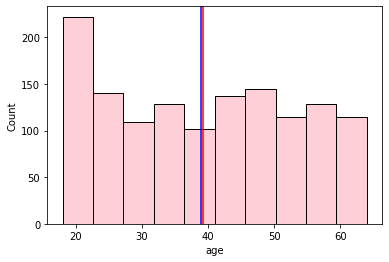

In [11]:
sns.histplot(data = df, x = "age", bins = 10, color = "pink")
plt.axvline(media_age, color='red')
plt.axvline(median_age, color='blue');

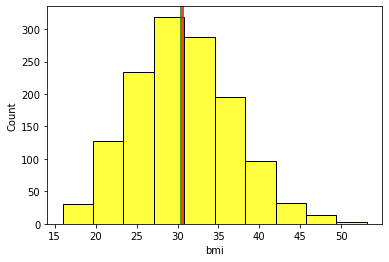

In [12]:
sns.histplot(data = df, x = "bmi", bins = 10, color = "yellow")
plt.axvline(media_bmi, color='red')
plt.axvline(median_bmi, color='green');

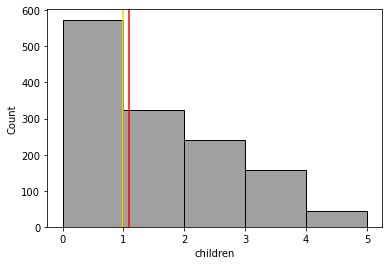

In [13]:
sns.histplot(data = df, x = "children", bins = 5, color = "grey")
plt.axvline(media_children, color='red')
plt.axvline(median_children, color='gold');

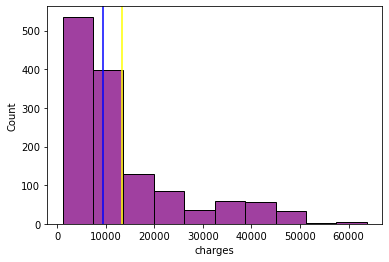

In [14]:
sns.histplot(data = df, x = "charges", bins = 10, color = "purple")
plt.axvline(media_charges, color='yellow')
plt.axvline(median_charges, color='blue');

Veamos detalles de la columna "Charges"

In [15]:
skewness = np.round(skew(df['charges']), decimals=2)
print(f"Tenemos un sesgo de {skewness}, lo cual nos indica que tenemos un sesgo positivo o sea un sesgado a la derecha")

Tenemos un sesgo de 1.51, lo cual nos indica que tenemos un sesgo positivo o sea un sesgado a la derecha


In [16]:
data=df["charges"]
media=np.mean(data)
confianza=st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
print(f"Tenemos un intervalo de confianza de: {confianza}")
print(f"Y tenemos de media {media}")

Tenemos un intervalo de confianza de: (12620.954034192644, 13919.890496089869)
Y tenemos de media 13270.422265141257


In [17]:
varianza = df["charges"].var()
print(f"La varianza de los costes es: {varianza}")

La varianza de los costes es: 146652372.1528548


In [18]:
df["diferencia"] = df["charges"] - df["charges"].mean()
print("La desviación respecto a la media es:")
print(df["diferencia"])
suma=df["diferencia"].sum()
print(f"La suma de todos estos valores es:{suma}")


La desviación respecto a la media es:
0        3614.501735
1      -11544.869965
2       -8820.960265
3        8714.048345
4       -9403.567065
            ...     
1333    -2669.873965
1334   -11064.441465
1335   -11640.588765
1336   -11262.477265
1337    15870.938035
Name: diferencia, Length: 1338, dtype: float64
La suma de todos estos valores es:-1.1932570487260818e-09


In [19]:
desviacion_estandar = df["charges"].std()
print(f"La desviación estándar de nuestros datos es: {round(desviacion_estandar, 2)}")

La desviación estándar de nuestros datos es: 12110.01


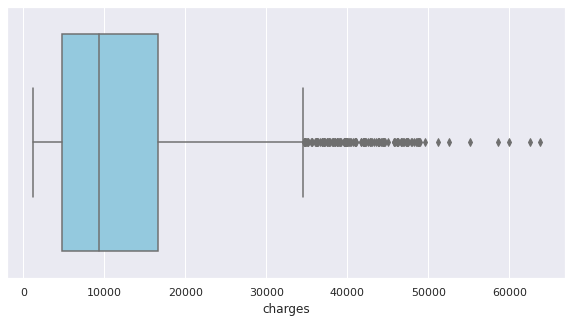

In [20]:
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")
# Creando el grafico de cajas
sns.boxplot(data = df, x =  "charges", color=  "skyblue");

In [21]:
# calculamos los cuartiles
q3, q1 = np.percentile(df["charges"], [75, 25])

print(f"El primer cuartil es {q1} y el tercer cuartil es {q3}")

El primer cuartil es 4740.28715 y el tercer cuartil es 16639.912515


In [22]:
riq = q3 - q1
print("El rango intercuartílico es:", riq)

El rango intercuartílico es: 11899.625365


Coeficiente de variación

In [23]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
df_southwest = df[df["region"] == 'southwest']
df_southwest.head(2)

,age,sex,bmi,children,smoker,region,charges,diferencia
0,19,female,27.9,0,yes,southwest,16884.924,3614.501735
12,23,male,34.4,0,no,southwest,1826.843,-11443.579265


In [25]:
df_southeast = df[df["region"] == 'southeast']
df_southeast.head(2)

,age,sex,bmi,children,smoker,region,charges,diferencia
1,18,male,33.77,1,no,southeast,1725.5523,-11544.869965
2,28,male,33.00,3,no,southeast,4449.4620,-8820.960265


In [26]:
df_northwest = df[df["region"] == 'northwest']
df_northwest.head(2)

,age,sex,bmi,children,smoker,region,charges,diferencia
3,33,male,22.705,0,no,northwest,21984.47061,8714.048345
4,32,male,28.880,0,no,northwest,3866.85520,-9403.567065


In [27]:
df_northeast = df[df["region"] == 'northeast']
df_northeast.head(2)

,age,sex,bmi,children,smoker,region,charges,diferencia
8,37,male,29.83,2,no,northeast,6406.4107,-6864.011565
10,25,male,26.22,0,no,northeast,2721.3208,-10549.101465


Calculando la media y la desviación estándar para cada uno de los datasets que acabamos de crear. 

In [28]:
# calculamos las medias
media_southwest = df_southwest["charges"].mean()
media_southeast = df_southeast["charges"].mean()
media_northwest = df_northwest["charges"].mean()
media_northeast = df_northeast["charges"].mean()

In [29]:
# calculamos las desviaciones
desviacion_southwest = df_southwest["charges"].std()
desviacion_southeast = df_southeast["charges"].std()
desviacion_northwest = df_northwest["charges"].std()
desviacion_northeast = df_northeast["charges"].std()

In [30]:
coef_sur_oeste=desviacion_southwest/media_southwest
coef_sur_este=desviacion_southeast/media_southeast
coef_nor_oeste=desviacion_northwest/media_northwest
coef_nor_este=desviacion_northeast/media_northeast

In [31]:
print("Los coeficientes de variación son:")
print(f"Para el Suroeste: {coef_sur_oeste}")
print(f"Para el Sureste: {coef_sur_este}")
print(f"Para el Noroeste: {coef_nor_oeste}")
print(f"Para el Noreste: {coef_nor_este}")

Los coeficientes de variación son:
Para el Suroeste: 0.9360360992843455
Para el Sureste: 0.9481308783365658
Para el Noroeste: 0.8916617450771123
Para el Noreste: 0.8395852775833182


Correlación y Tabla de contingencia

In [32]:
matriz_correlacion=np.corrcoef(df["charges"],df["age"])
print("La correlación entre charges y age es:")
print(matriz_correlacion)

La correlación entre charges y age es:
[[1.         0.29900819]
 [0.29900819 1.        ]]


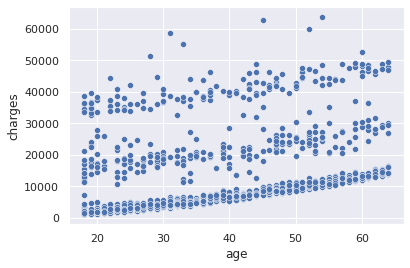

In [33]:
sns.scatterplot(data = df, x = "age", y = "charges");

In [34]:
m_correlacion_pandas = df.corr()
m_correlacion_pandas

,age,bmi,children,charges,diferencia
age,1.000000,0.109272,0.042469,0.299008,0.299008
bmi,0.109272,1.000000,0.012759,0.198341,0.198341
children,0.042469,0.012759,1.000000,0.067998,0.067998
charges,0.299008,0.198341,0.067998,1.000000,1.000000
diferencia,0.299008,0.198341,0.067998,1.000000,1.000000


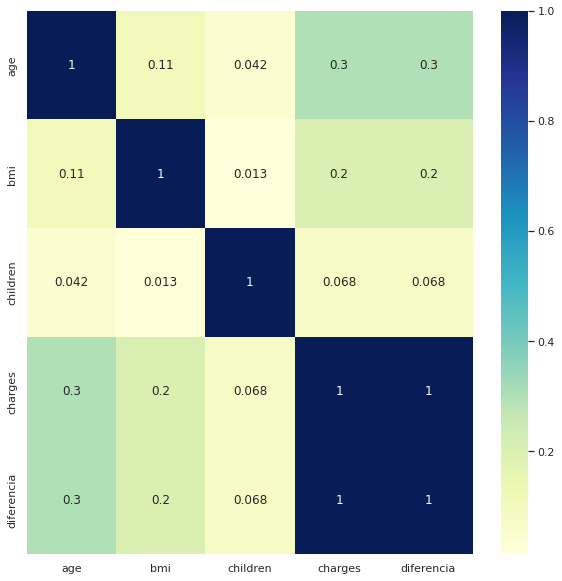

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(m_correlacion_pandas,
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación

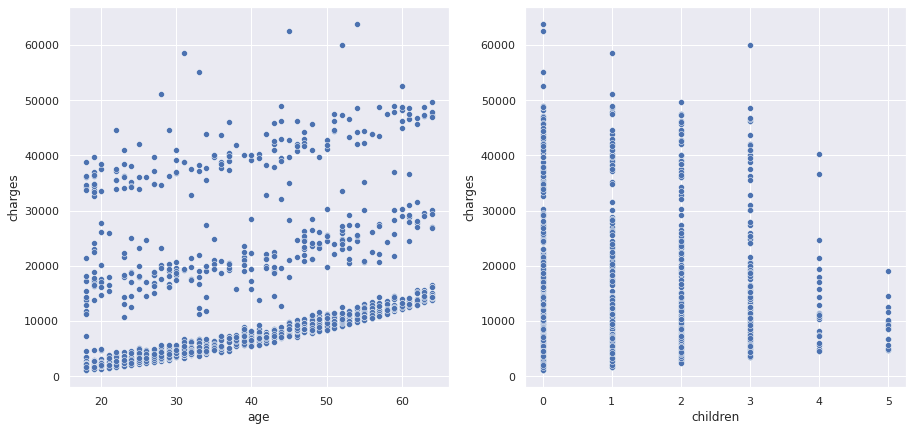

In [36]:
# iniciamos los subplots y el tamaño de la figura
fig,ax = plt.subplots(1,2, figsize = (15, 7))

# creamos los distintos scatterplot
sns.scatterplot(data = df, x = "age", y = "charges", ax = ax[0])
sns.scatterplot(data = df, x = "children", y = "charges", ax = ax[1]);

¿Cómo se relacionan todas nuestras columnas?

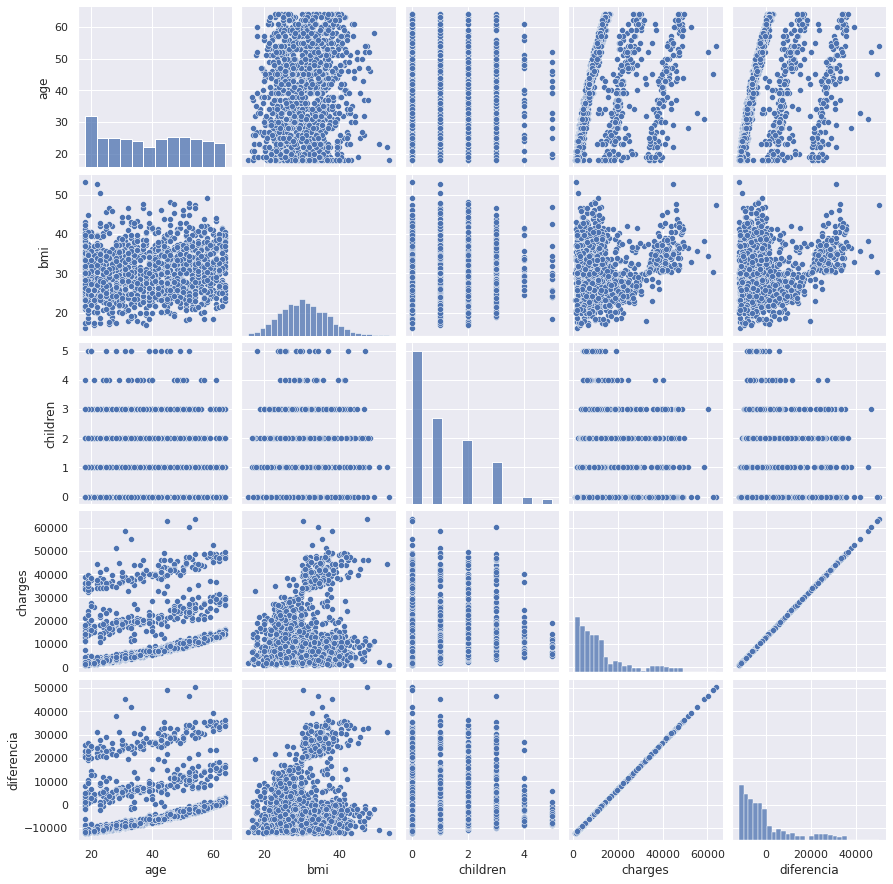

In [37]:
sns.pairplot(df);

In [38]:
data_crosstab=pd.crosstab(df["children"],df["age"])
data_crosstab

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
children,,,,,,,,,,,,,,,,,,,,,
0,51,50,17,16,18,13,23,12,10,14,...,13,16,16,21,10,19,15,16,17,13
1,9,11,6,5,4,6,1,6,9,6,...,5,4,6,2,6,2,3,3,2,3
2,6,5,3,5,2,5,1,4,7,3,...,4,3,3,2,3,0,2,2,1,4
3,2,1,1,1,4,4,2,3,1,5,...,4,2,0,0,6,2,2,2,3,2
4,1,0,0,1,0,0,1,2,1,0,...,0,1,1,0,0,0,1,0,0,0
5,0,1,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


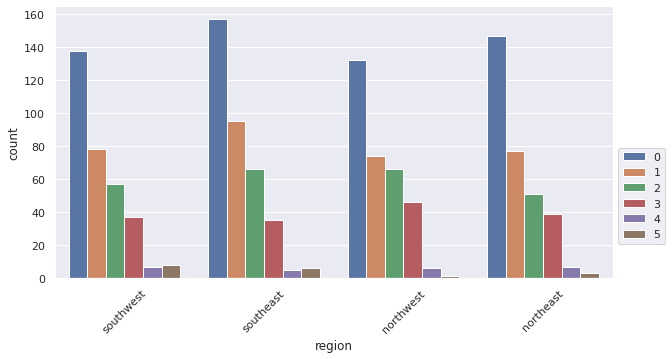

In [39]:
plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data = df, x = "region", hue = "children") # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.